<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [6]:
df = pd.read_csv('states_edu.csv')

Chosen test: Math 4 score data

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [11]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

In [12]:
df.ENROLL_ALL.isna().sum()

74

In [13]:
(df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS).describe()

count       395.000000
mean       4964.541772
std       17251.435588
min           0.000000
25%           0.000000
50%           0.000000
75%        1044.000000
max      147954.000000
dtype: float64

In [14]:
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df.ENROLL_PREK+df.ENROLL_PRIMARY+df.ENROLL_HS)

In [15]:
df.ENROLL_ALL.isna().sum()

74

In [16]:
((df.ENROLL_ALL - df.ENROLL_ALL_EST)/df.ENROLL_ALL).describe()

count    398.000000
mean       0.025870
std        0.051259
min       -0.096404
25%        0.003985
50%        0.013510
75%        0.031369
max        0.450693
dtype: float64

In [17]:
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

In [18]:
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum()

0

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [19]:
df['STATE_REVENUE_PER_STUDENT'] = df['STATE_REVENUE'] / df['ENROLL_ALL']

In [20]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: revenue/student, support services spending/student

Feature selection justification: Want to see how the state revenue per student relates to spending and success. Does being in a wealthier state with less student spending mean you're better off than poorer state with more spending per student?

<h2> EDA </h2>

Visualization 1

<AxesSubplot:xlabel='STATE_REVENUE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

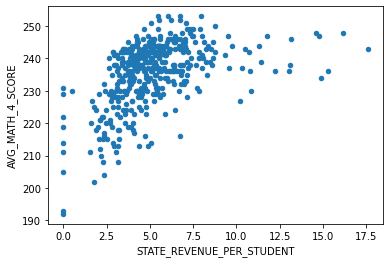

In [24]:
df.plot.scatter(x='STATE_REVENUE_PER_STUDENT', y='AVG_MATH_4_SCORE')

State revenue per student plotted against math 4 score

Visualization 2

KeyError: 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT/STATE_REVENUE_PER_STUDENT'

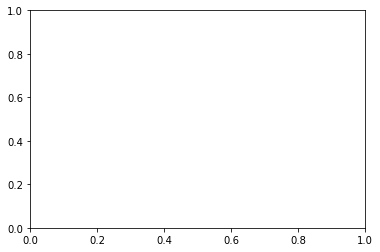

In [27]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE')

State Expenditure per student plotted against math 4 score

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = ??
y = ??

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=??, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [ ]:
# import your sklearn class here


In [ ]:
# create your model here
model = 

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [ ]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = ??
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel(??)

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**